# Import libraries and define root directory

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

root = "//data/becker/dopl4670/TDSE_Jobs/tests/qprop_lin_sample/"

data = np.load(root+"PES_files/PES.npy")


E = np.load(root+"PES_files/E_range.npy")
t = np.load(root+"TDSE_files/t_total.npy")
dt = t[1]-t[0]





# Plot of PES for each job near ATI peaks and sub-structure peaks

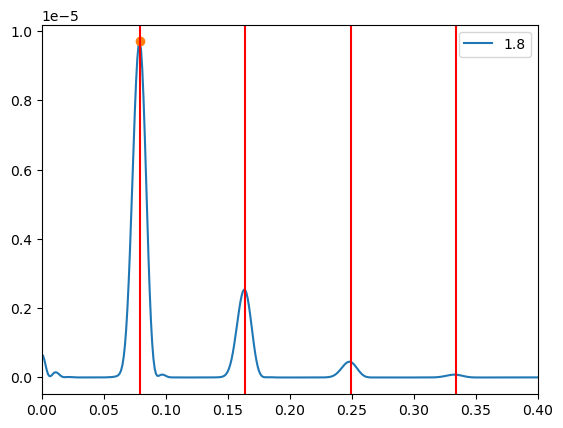

In [32]:

plt.plot(E, data, label="1.8")
plt.xlim([0,0.4])

peaks_data_1,_ = find_peaks(data)


plt.plot(E[peaks_data_1[3]], data[peaks_data_1[3]], 'o')


plt.legend()

(0.07899999999999996, 7), (0.16399999999999992, 8), (0.2489999999999999, 9), (0.33399999999999996, 10)

plt.axvline(0.07899999999999996, color='r')
plt.axvline(0.16399999999999992, color='r')
plt.axvline(0.2489999999999999, color='r')
plt.axvline(0.33399999999999996, color='r')




# Prediction of peaks for Job 1

[(0.07899999999999996, 7), (0.16399999999999992, 8), (0.2489999999999999, 9), (0.33399999999999996, 10)]


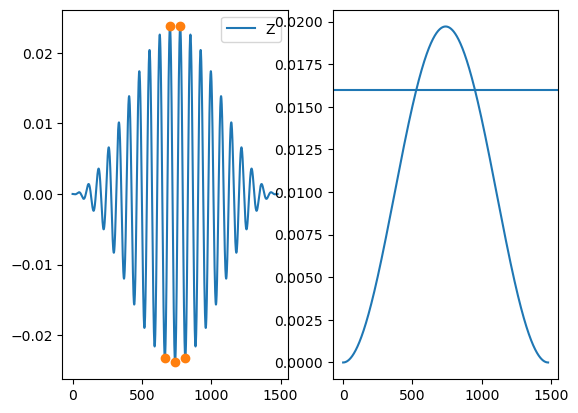

In [35]:
fig,(ax1,ax2) = plt.subplots(1,2,sharex=True)

top = 5

Az = np.load(root+"TDSE_files/Az.npy")
Ez = -np.gradient(Az, dt)

peak_indices_z, _ = find_peaks(np.abs(Ez)) 
 


Ez_peaks_mag = np.abs(Ez[peak_indices_z]) 
 


top_indices_z = np.argsort(Ez_peaks_mag)[-top:][::-1]





top_original_indices_z =np.sort(peak_indices_z[top_indices_z])



ax1.plot(t,Ez,label = "Z") 

ax1.plot(t[top_original_indices_z], Ez[top_original_indices_z], 'o') 

ax1.legend()



Ip = 0.5
N = 20
w=0.085
I = 2e13 / 3.51E16

tau = 2*np.pi * N/w
envelope = np.sin(np.pi*t/tau)**2
I_profile = I * envelope
Up = I_profile/(4*w**2)


E_test_1 = []


specific_peak = top_original_indices_z[0]
#Up_val = Up[specific_peak]
Up_val = 0.016000000000000125
for i in range(15):
    E_temp = i * w - (Ip + Up_val)
    if E_temp>0 and E_temp<0.4:
        
        E_test_1.append((E_temp,i))

print(E_test_1)

ax2.plot(t,Up)
#plt.axvline(t[specific_peak], color='r')

plt.axhline(0.016000000000000125)

